# Practice with Merges.

Run the cells below to create the following dataframes.

df_purchases contains information on various customer purchases.

In [1]:
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26800 sha256=1b80ef260425d1500badd7f18a1cc19c43ef5956df1b102798e6d6a26a999658
  Stored in directory: c:\users\hsupo\appdata\local\pip\cache\wheels\68\5d\a5\edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [2]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np

names = ["Jake", "Joe", "Ellen", "Joe", "Ellen"]
item = ["Ball", "Shirt", "Shoes", "Ball", "Shirt"]

df_purchases = pd.DataFrame({"Name": names, "Item_Purchased": item} )
                    
df_purchases

,Name,Item_Purchased
0,Jake,Ball
1,Joe,Shirt
2,Ellen,Shoes
3,Joe,Ball
4,Ellen,Shirt


df_items contains information on the prices of each item.

In [3]:
item = ["Ball", "Shirt", "Shoes"]
price = [10,15,75]

df_items = pd.DataFrame({"Item": item, "Price":price})

df_items

,Item,Price
0,Ball,10
1,Shirt,15
2,Shoes,75


df_customer contained information on the customers 

In [4]:
customers = ["Jake", "Joe", "Ellen"]
allowance = [15, 12, 85]

df_customers = pd.DataFrame({"Allowance":allowance, "Customers":customers})

df_customers

,Allowance,Customers
0,15,Jake
1,12,Joe
2,85,Ellen


### Question: How many customers went over their allowance?

Create df_1, which is df_purchases with an additional column that gives the price of each item

In [19]:
df_1 = df_purchases.merge( df_items, how = "inner", left_on = "Item_Purchased", right_on ="Item")
df_1

,Name,Item_Purchased,Item,Price
0,Jake,Ball,Ball,10
1,Joe,Ball,Ball,10
2,Joe,Shirt,Shirt,15
3,Ellen,Shirt,Shirt,15
4,Ellen,Shoes,Shoes,75


Create df_2, which stores the total amount that each person spent.

In [20]:
df_1_sub = df_1.loc[ :, ["Name", "Price"] ]
df_2 = df_1_sub.groupby("Name")['Price'].sum()
df_2 = df_2.reset_index()
df_2

,Name,Price
0,Ellen,90
1,Jake,10
2,Joe,25


Created df_3, which adds each person't allowance to df_2

In [21]:
df_3 = df_2.merge( df_customers, how = "inner", left_on = "Name", right_on ="Customers")
df_3

,Name,Price,Allowance,Customers
0,Ellen,90,85,Ellen
1,Jake,10,15,Jake
2,Joe,25,12,Joe


Add a column to df_3 which tells whether or not they went over their allowance or not.

In [23]:
df_3["Over_Allowance"] = df_3["Allowance"] - df_3["Price"] < 0
df_3

,Name,Price,Allowance,Customers,Over_Allowance
0,Ellen,90,85,Ellen,True
1,Jake,10,15,Jake,False
2,Joe,25,12,Joe,True


Compute how many people went over.

In [30]:
sum(df_3["Over_Allowance"])

2

In [31]:
# Put Your ChatGPt codes here


# Running Back Analysis Tool

The goal in this practice is to analyze the number of rushing yards gained by an inputted running back over the various weeks that the data contains.  We also would like to incorporate whether the given running back went up against good defenses.  To do so, we will compute the average rushing yards given up by each of the given running back's opponents throughout the weeks.


In [5]:
#Place your imports here
import pandas as pd
import matplotlib.pyplot as plt

  Read in the data from the following 4 csv files: nflgames.csv, nflteams.csv, nflplayers.csv, rushingstats.csv. Filter the rushing stats so it only corresponds to running backs (PositionID = 2)

In [63]:
#read in the data below
games = pd.read_csv("Data/Football_Data/nflgames.csv")
teams = pd.read_csv("Data/Football_Data/nflteams.csv")
nflPlayers = pd.read_csv("Data/Football_Data/nflplayers.csv")
rushingStats=pd.read_csv("Data/Football_Data/rushingstats.csv")

rushingStats = rushingStats.loc[rushingStats["PositionID"] == 2, :]


print(games.head(3))
print(teams.head(3))
print(nflPlayers.head(3))
print(rushingStats.head(3))

   GameID  Week  HomeTeamID  AwayTeamID  HomeScore  AwayScore DayOfWeek  \
0       1     1           1          29         16         23       Sun   
1       2     2           1          28         26          6       Thu   
2       3     3          27           1         21         23       Sun   

  TimeOfDay  FieldType  Temp  Wind  
0       Day  sportturf    74     8  
1     Night  sportturf    82     6  
2       Day     grass     71    23  
   TeamID          TeamName TeamCapsAbrv TeamAbrv
0       1  Baltimore Ravens          RAV      rav
1       2    Denver Broncos          DEN      den
2       3   Oakland Raiders          RAI      rai
   PlayerID     PlayerName  PositionID  TeamID
0         1    Kamar Aiken           3       1
1         2   Marlon Brown           3       1
2         3  Jeremy Butler           3       1
    RushingStatsID  PlayerID  PositionID  TeamID  GameID  Att  Yds  Lng  TD  \
10              11         7           2       1       1   11   70   13   1   
11   

Enter the name of the running back you would like to analyze and then find the player's player ID and Team ID.

In [54]:
#Write your code here
name = "LeVeon Bell"
playerINFO = nflPlayers.groupby("PlayerID").filter( lambda x: x["PlayerName"] == name ).loc[:,["PlayerID","TeamID"]]
playerINFO

,PlayerID,TeamID
520,521,28


Next select the rushing stats corresponding to this player and merge this df with the games df to find the week. In this merged df select the following columns: TeamID, GameID, Yds, Week, HomeTeamID, AwayTeamID. Sort the resulting df by Week.

In [66]:
#Write your code here
#game merge with rushingStats
g_r = games.merge( rushingStats, how = "inner", on = "GameID" ).loc[ :, ["PlayerID", "TeamID","GameID", "Yds", "Week", "HomeTeamID", "AwayTeamID"] ]
g_r = g_r.sort_values(by="Week")
g_r

#player X g_r
playerStat = g_r.merge( playerINFO, how = "inner", on = "PlayerID" )
playerStat

,PlayerID,TeamID_x,GameID,Yds,Week,HomeTeamID,AwayTeamID,TeamID_y
0,521,28,186,109,1,28,27,28
1,521,28,2,59,2,1,28,28
2,521,28,124,147,3,15,28,28
3,521,28,146,63,4,28,19,28
4,521,28,62,82,5,6,28,28
5,521,28,187,82,6,27,28,28
6,521,28,114,57,7,28,13,28
7,521,28,72,92,8,28,7,28
8,521,28,9,20,9,28,1,28
9,521,28,185,36,10,26,28,28


Create a line chart showing the rushing yards per game for this player.

[Text(0.5, 1.0, 'Rushing Yards by Week for LeVeon Bell'),
 Text(0.5, 0, 'Week'),
 Text(0, 0.5, 'Rusing Yards')]

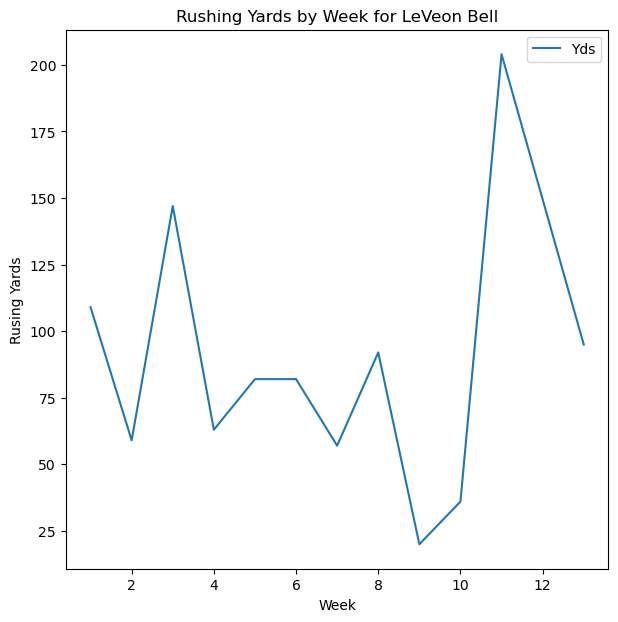

In [69]:
%matplotlib inline

fig, ax = plt.subplots( figsize = [7,7] )
playerStat.plot( kind = "line", x = "Week", y = "Yds", ax = ax)
ax.set( title = "Rushing Yards by Week for %s" %name, xlabel = "Week", ylabel = "Rusing Yards")

In [ ]:
#Put Your ChatGPT codes here


